<a href="https://colab.research.google.com/github/Nattakonjpg/Coffee-Shop-Sales/blob/main/Coffee_Shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install package

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data.xlsx


In [5]:
file_path = '/content/drive/MyDrive/Data/Bank/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


##Question 1 How have Maven Roasters sales trended over time?

In [61]:
#Step 1 Create New dataframe
df_treand_test = df[['transaction_date','transaction_qty','unit_price']]

#Step 2 Groupby Transaction_date
df_treand_test_2 = df_treand_test.groupby('transaction_date', as_index=False)[['transaction_qty', 'unit_price']].sum()

#Step 3 Tranform transaction_date to datetime and start with day/month/year
df_treand_test_2['transaction_date'] = pd.to_datetime(df_treand_test_2['transaction_date'], dayfirst=True, errors='coerce')

#Step 4 transaction_date to index
df_treand_test_2.set_index('transaction_date', inplace=True)

In [63]:
#Step 5 Sum value in column in month
df_monthly_qty_2 = df_treand_test_2[['transaction_qty']].resample('M').sum()
df_monthly_unit_2 = df_treand_test_2[['unit_price']].resample('M').sum()

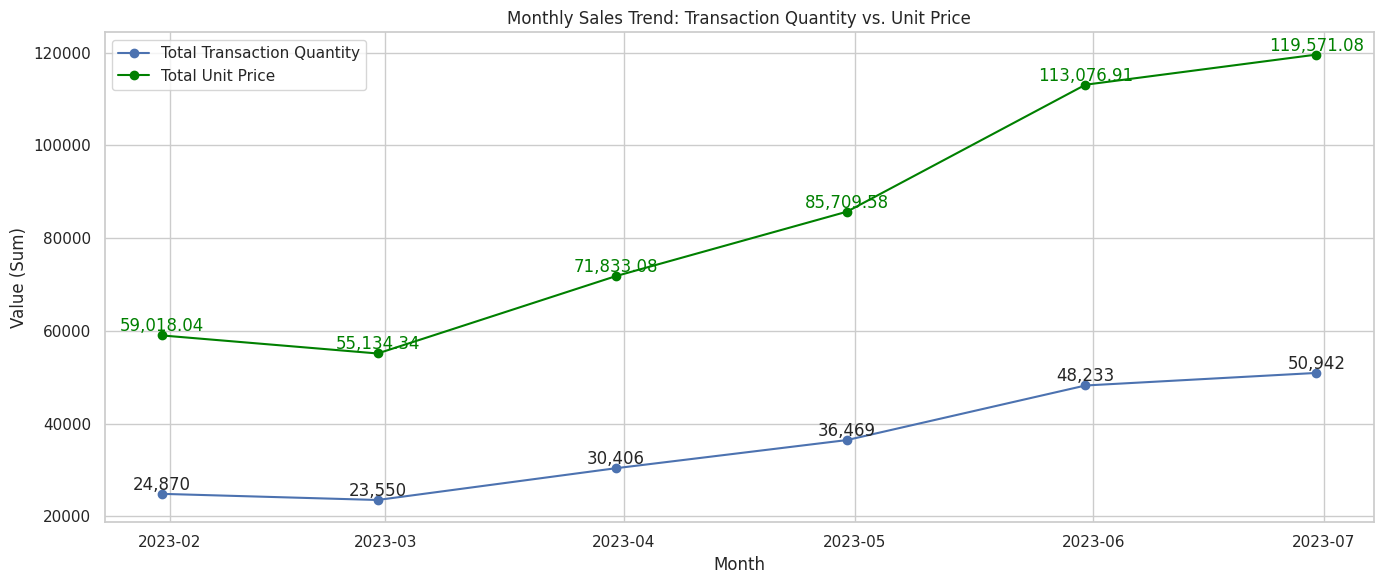

In [65]:
#Step 6 Create plot graph
plt.figure(figsize=(14, 6))

# พล็อต Total Transaction Quantity
plt.plot(df_monthly_qty_2.index, df_monthly_qty_2.iloc[:, 0], marker='o', linestyle='-', label='Total Transaction Quantity')

# เพิ่มป้ายกำกับ Transaction Quantity
for x, y in zip(df_monthly_qty_2.index, df_monthly_qty_2.iloc[:, 0]):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=12)

# พล็อต Total Unit Price
plt.plot(df_monthly_unit_2.index, df_monthly_unit_2.iloc[:, 0], marker='o', linestyle='-', color='green', label='Total Unit Price')

# เพิ่มป้ายกำกับ Unit Price
for x, y in zip(df_monthly_unit_2.index, df_monthly_unit_2.iloc[:, 0]):
    plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom', fontsize=12, color='green')

plt.title('Monthly Sales Trend: Transaction Quantity vs. Unit Price')
plt.xlabel('Month')
plt.ylabel('Value (Sum)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Question 2. Which days of the week tend to be busiest, and why do you think that's the case?

In [66]:
# Step 1 Create New dataframe
df_bs = df[['transaction_date','transaction_qty','store_location','product_category','unit_price']]

# Step 2 groupby transaction_date, store_location, product_category with Sum qty,unit_price
df_bs2 = df_bs.groupby(['transaction_date','store_location','product_category'], as_index=False)[['transaction_qty', 'unit_price']].sum()

##### Store_location = Astoria

In [67]:
# Step 3 focus store_location at Astoria
df_bs2_AS = df_bs2[df_bs2['store_location'] == 'Astoria']

# Step 4 แปลง transaction date ให้เป็น datetime
df_bs2_AS['transaction_date'] = pd.to_datetime(df_bs2_AS['transaction_date'], dayfirst=True, errors='coerce')

# Step 5 Count day of week
df_bs2_AS['day_of_week'] = df_bs2_AS['transaction_date'].dt.day_name()
day_counts = df_bs2_AS['day_of_week'].value_counts()

# Step 6 Sort date Create dataframe Day of week and sort by day dataframe
day_order  = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)


<ipython-input-67-1056438729>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs2_AS['transaction_date'] = pd.to_datetime(df_bs2_AS['transaction_date'], dayfirst=True, errors='coerce')
<ipython-input-67-1056438729>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs2_AS['day_of_week'] = df_bs2_AS['transaction_date'].dt.day_name()


In [68]:
# Step 7 Groupby transaction_date, product_category with Sum qty, unit_price
df_bs2_AS_2 = df_bs2_AS.groupby(['transaction_date', 'product_category'], as_index=False)[['transaction_qty', 'unit_price']].sum()

# Step 8 Create Day of week
df_bs2_AS_2['day_of_week'] = df_bs2_AS_2['transaction_date'].dt.day_name()


In [69]:
# Step 9
# Step 9.1 Create table only product and day of week
df_bs2_AS_2_P_D = df_bs2_AS_2[['product_category','day_of_week']]

# Step 9.1.1 Groupby และ นับจำนวนครั้งที่สินค้าแต่ละประเภทปรากฏในแต่ละวันของสัปดาห์ แล้วจัดให้อยู่ในรูปแบบตารางที่พร้อมนำไปสร้างกราฟได้ง่ายครับ
# Size นับจำนวนแถว หรือ จำนวนรายการ ในแต่ละกลุ่มย่อย
# unstack เปลี่ยนโครงสร้าง ของข้อมูล ที่มี day_of_week เป็น Index หลัก
category_day_counts = df_bs2_AS_2.groupby(['day_of_week', 'product_category']).size().unstack(fill_value=0)

In [70]:
# Step 9.1.2 Create day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 9.1.3 Sort by day_order
category_day_counts = category_day_counts.reindex(day_order, fill_value=0)

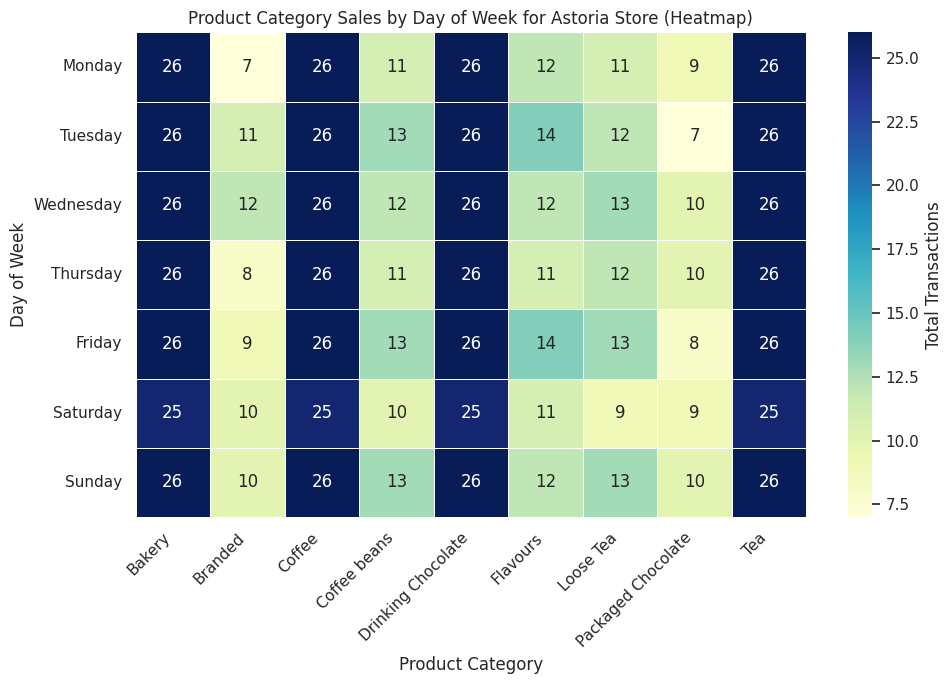

In [71]:
# Step 9.1.4 Create heatmap to see how many prduct in day of week
plt.figure(figsize=(10, 7))
sns.heatmap(
    category_day_counts,
    annot=True, # แสดงตัวเลขในแต่ละช่อง
    fmt='g',    # รูปแบบตัวเลข (g คือ general format)
    cmap='YlGnBu', # โทนสี (Yellow-Green-Blue) ยิ่งเข้มยิ่งค่าสูง
    linewidths=.5, # เส้นแบ่งระหว่างช่อง
    cbar_kws={'label': 'Total Transactions'} # ป้ายกำกับแถบสี
)

plt.title('Product Category Sales by Day of Week for Astoria Store (Heatmap)')
plt.xlabel('Product Category')
plt.ylabel('Day of Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
# Step 9.2 Create new table to see what income product per month
df_bs2_AS_2_D_P_U_D = df_bs2_AS_2[['transaction_date','transaction_qty','product_category','unit_price','day_of_week']]

# Step 9.2.1 Tranform transaction_date to datetime and start with day/month/year and set index
df_bs2_AS_2_D_P_U_D['transaction_date'] = pd.to_datetime(df_bs2_AS_2_D_P_U_D['transaction_date'], dayfirst=True, errors='coerce')
df_bs2_AS_2_D_P_U_D.set_index('transaction_date', inplace=True)

# Step 9.2.2 Check unique value of product_category
df_bs2_AS_2_D_P_U_D['product_category'].unique()

# Step 9.2.3 Create df only product bakery and create new column of income by use transaction * unit_price
df_bs2_AS_2_bakery = df_bs2_AS_2_D_P_U_D[df_bs2_AS_2_D_P_U_D['product_category']=='Bakery']
df_bs2_AS_2_bakery['income'] = df_bs2_AS_2_bakery['transaction_qty']*df_bs2_AS_2_bakery['unit_price']

# Step 9.2.4 groupby and sum qty, income
df_bs2_AS_2_bakery_2 = df_bs2_AS_2_bakery.groupby(['transaction_date','product_category'])[['transaction_qty', 'income']].sum()

# Step 9.2.5 drop column product_category to only have index transaction_date
df_bakery_daily_summary = df_bs2_AS_2_bakery_2.droplevel('product_category')

# Step 9.2.6 จัดกลุ่มข้อมูลตามช่วงเวลารายเดือน
df_bakery_daily_summary_month = df_bakery_daily_summary.resample('M').sum()

<ipython-input-72-3984628652>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs2_AS_2_bakery['income'] = df_bs2_AS_2_bakery['transaction_qty']*df_bs2_AS_2_bakery['unit_price']
<ipython-input-72-3984628652>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bakery_daily_summary_month = df_bakery_daily_summary.resample('M').sum()


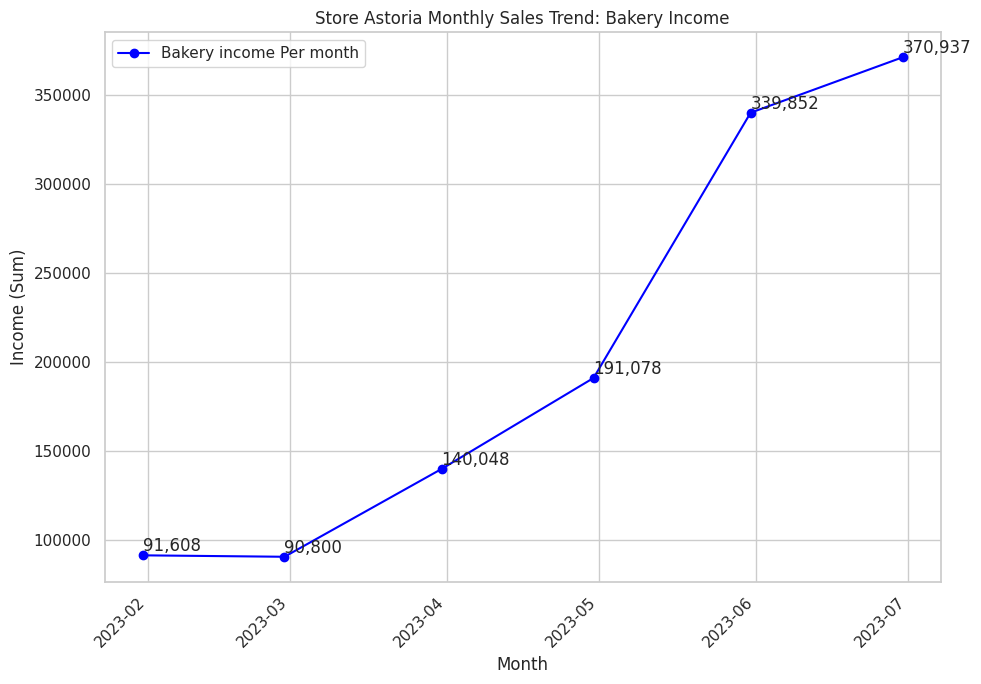

In [73]:
## Step 9.2.7 Create line graph
plt.figure(figsize=(10, 7))
plt.plot(df_bakery_daily_summary_month.index, df_bakery_daily_summary_month['income'],
         marker='o', linestyle='-', color='blue', label='Bakery income Per month')

# เพิ่มป้ายกำกับ Transaction income per month
for x, y in zip(df_bakery_daily_summary_month.index, df_bakery_daily_summary_month['income']):
        plt.text(x, y, f'{int(y):,}', ha='left', va='bottom', fontsize=12)

plt.title('Store Astoria Monthly Sales Trend: Bakery Income')
plt.xlabel('Month')
plt.ylabel('Income (Sum)')
plt.grid(True)
plt.legend()

# ตั้งค่ารูปแบบวันที่บนแกน X ให้ดูง่ายขึ้น (แสดงแค่ชื่อเดือนหรือเดือน-ปี)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m')) # เช่น 2023-01
plt.xticks(rotation=45, ha='right') # หมุนป้ายกำกับแกน X

plt.tight_layout() # ปรับเลย์เอาต์เพื่อป้องกันป้ายกำกับทับกัน
plt.show()


##Question 3 Which products are sold most and least often?
- Which drive the most revenue for the business?


#### แยก dataframe store_location ออกเป็น 3 ร้าน

In [26]:
df_3 =df.copy()
df_Hell = df_3[df_3['store_location']=="Hell's Kitchen"]
df_Low = df_3[df_3['store_location']=="Lower Manhattan"]
df_AS= df_3[df_3['store_location']=="Astoria"]

#### Dataframe ร้าน Hell's Kitchen
- groupby ข้อมูลด้วย วันที่ และ ประเภทสินค้า ด้วยผลรวม จำนวนการขาย และ ราคาสินค้า

In [9]:
df_h_gb = df_Hell.groupby(['transaction_date','product_category'])[['transaction_qty','unit_price']].sum().reset_index()
df_h_gb

,transaction_date,product_category,transaction_qty,unit_price
0,2023-01-01,Bakery,18,65.25
1,2023-01-01,Coffee,133,278.65
2,2023-01-01,Drinking Chocolate,17,55.00
3,2023-01-01,Tea,102,185.75
4,2023-01-02,Bakery,23,81.50
...,...,...,...,...
1254,2023-06-30,Drinking Chocolate,31,84.75
1255,2023-06-30,Flavours,40,20.00
1256,2023-06-30,Loose Tea,3,27.95
1257,2023-06-30,Packaged Chocolate,5,41.33


##### เพิ่มคอลัมน์ วัน เดือน ปี
- จากข้อมูล Transaction_date -> สำหรับสร้างกราฟแยกรายเดือน

In [10]:
df_h_gb['year'] = df_h_gb['transaction_date'].dt.year
df_h_gb['month'] = df_h_gb['transaction_date'].dt.month
df_h_gb['day'] = df_h_gb['transaction_date'].dt.day

In [11]:
dft1 = df_h_gb.groupby(['product_category'])['transaction_qty'].sum().reset_index()

##### Plot graph
- สร้างกราฟแยก ประเภทสินค้า ว่ามียอดขายเท่าไหร่

<ipython-input-38-2936603024>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( # Assign the plot to an axis object 'ax'


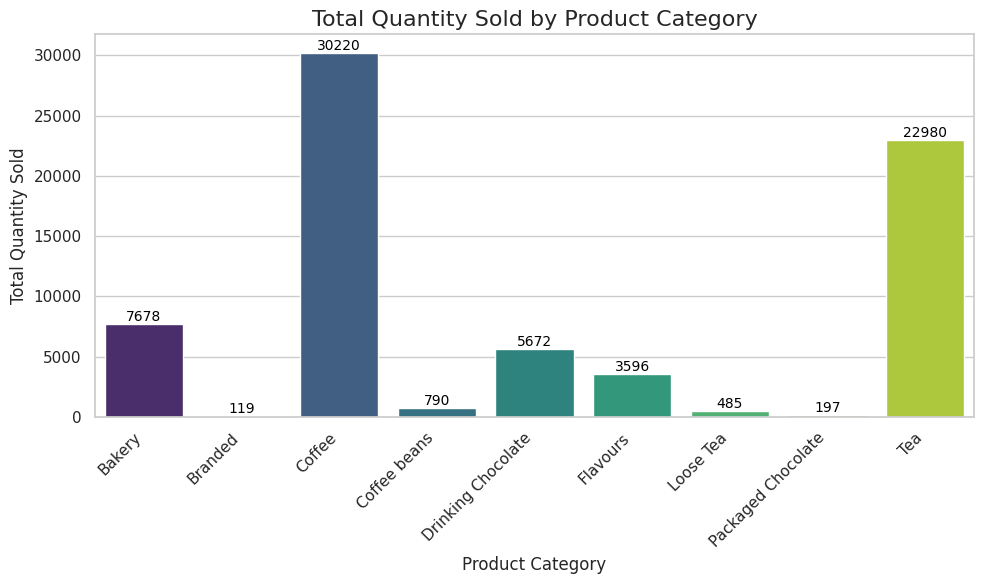

In [38]:
# Set a nice style for the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Create the bar plot
ax = sns.barplot( # Assign the plot to an axis object 'ax'
    data=dft1,
    x='product_category',
    y='transaction_qty',
    palette='viridis'
)

for p in ax.patches: # Iterate over each bar in the plot
    ax.annotate(f'{p.get_height():.0f}', # Format the height (transaction_qty) as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position x, y
                ha='center', va='center', # Horizontal and vertical alignment
                xytext=(0, 5), # Offset the text a bit above the bar
                textcoords='offset points', # Use offset points for xytext
                fontsize=10,
                color='black')


plt.title('Total Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

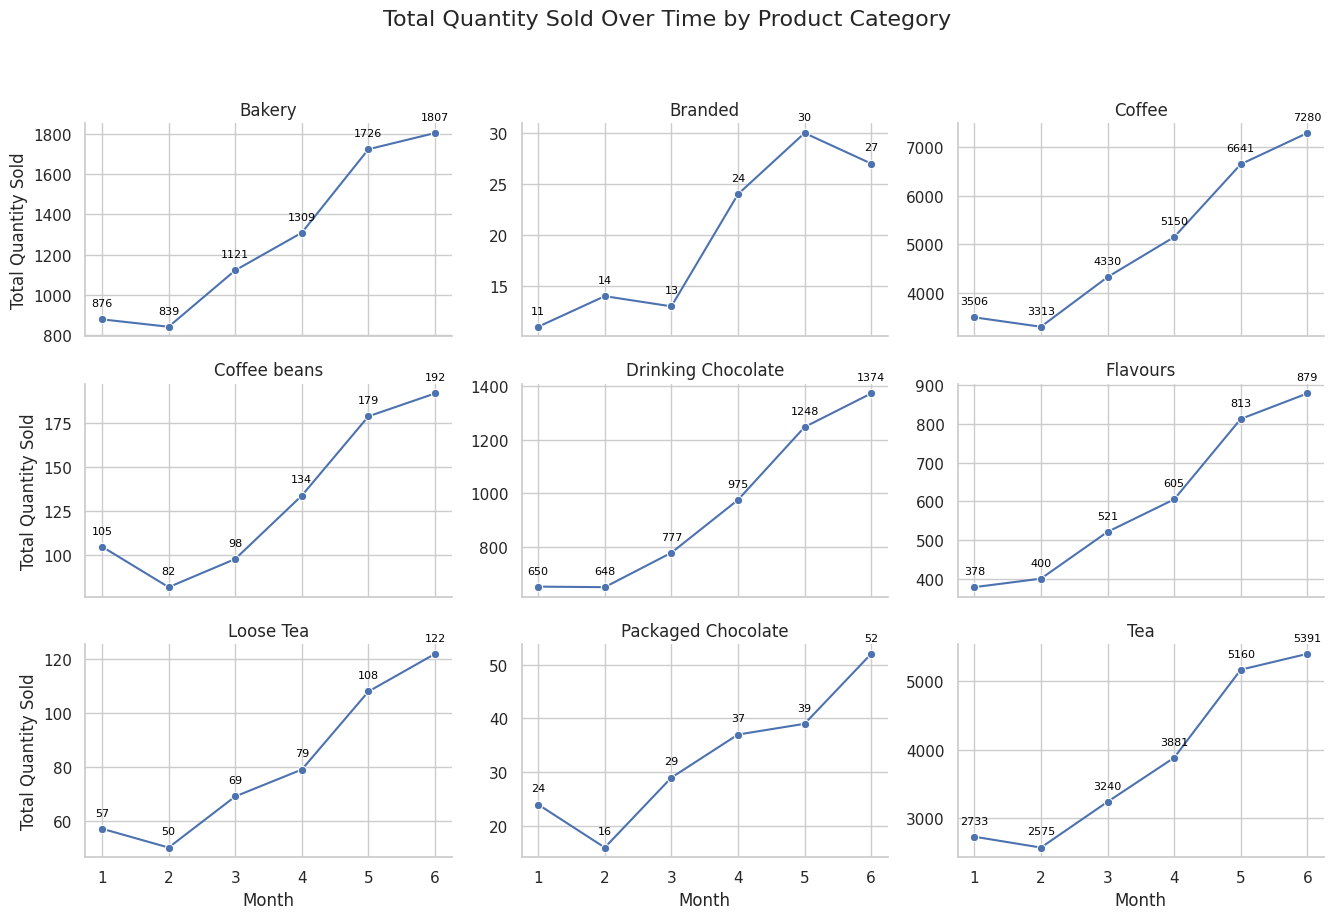

In [13]:
df_plot = df_h_gb.groupby(['product_category', 'month'])['transaction_qty'].sum().reset_index()

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Create a grid of line plots
g = sns.relplot(
    data=df_plot, # IMPORTANT: Use the AGGREGATED df_plot here for monthly sums
    x='month',
    y='transaction_qty',
    col='product_category',
    kind='line',
    col_wrap=3,
    height=3,
    aspect=1.5,
    facet_kws={'sharey': False},
    marker='o' # Add circle markers
)

# --- 4. Add Numerical Labels on Top of Each Marker ---
# Iterate through each individual subplot (Axes) in the FacetGrid
for ax in g.axes.flat:
    # Get the product_category for the current subplot from its title
    # The title usually follows the format 'product_category = [Category Name]'
    if ax.get_title():
        current_category = ax.get_title().split(' = ')[1]
    else:
        # Fallback if title format is unexpected; this shouldn't typically happen with relplot
        print(f"Warning: Could not parse category from title for subplot. Skipping labels for this subplot.")
        continue

    # Filter the aggregated data (df_plot) for the current product_category
    # This gets the specific (month, transaction_qty) points for this subplot
    category_data = df_plot[df_plot['product_category'] == current_category]

    # Annotate each data point on the current subplot
    for _, row in category_data.iterrows(): # Using _ for index as it's not needed
        # ax.annotate is used to add text to the plot
        ax.annotate(f'{row["transaction_qty"]:.0f}', # The text to display (formatted as integer)
                    (row['month'], row['transaction_qty']), # The (x,y) coordinates of the point
                    textcoords="offset points", # How to interpret xytext (as offsets from xy)
                    xytext=(0, 8), # Offset text 8 points directly above the marker
                    ha='center', # Horizontal alignment: center the text
                    va='bottom', # Vertical alignment: align text bottom with the point
                    fontsize=8, # Font size for the label
                    color='black') # Color of the label text

# --- 5. Final Plot Adjustments ---
g.set_axis_labels("Month", "Total Quantity Sold")
g.set_titles(col_template="{col_name}") # Use just the category name for subplot titles
plt.suptitle('Total Quantity Sold Over Time by Product Category', y=1.02, fontsize=16) # Main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

#### Dataframe ร้าน Lower Manhattan
- groupby ข้อมูลด้วย วันที่ และ ประเภทสินค้า ด้วยผลรวม จำนวนการขาย และ ราคาสินค้า

In [30]:
df_l_gb = df_Low.groupby(['transaction_date','product_category'])[['transaction_qty','unit_price']].sum().reset_index()
df_l_gb

,transaction_date,product_category,transaction_qty,unit_price
0,2023-01-01,Bakery,33,115.25
1,2023-01-01,Coffee,117,216.10
2,2023-01-01,Drinking Chocolate,20,49.00
3,2023-01-01,Tea,85,166.15
4,2023-01-02,Bakery,28,101.00
...,...,...,...,...
1317,2023-06-30,Drinking Chocolate,44,109.75
1318,2023-06-30,Flavours,49,24.00
1319,2023-06-30,Loose Tea,2,18.45
1320,2023-06-30,Packaged Chocolate,3,34.26


In [31]:
df_l_gb['year'] = df_l_gb['transaction_date'].dt.year
df_l_gb['month'] = df_l_gb['transaction_date'].dt.month
df_l_gb['day'] = df_l_gb['transaction_date'].dt.day

In [32]:
dft2 = df_l_gb.groupby(['product_category'])['transaction_qty'].sum().reset_index()
dft2

,product_category,transaction_qty
0,Bakery,8040
1,Branded,378
2,Coffee,29375
3,Coffee beans,536
4,Drinking Chocolate,5434
5,Flavours,4709
6,Loose Tea,381
7,Packaged Chocolate,180
8,Tea,22709


<ipython-input-37-288847555>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( # Assign the plot to an axis object 'ax'


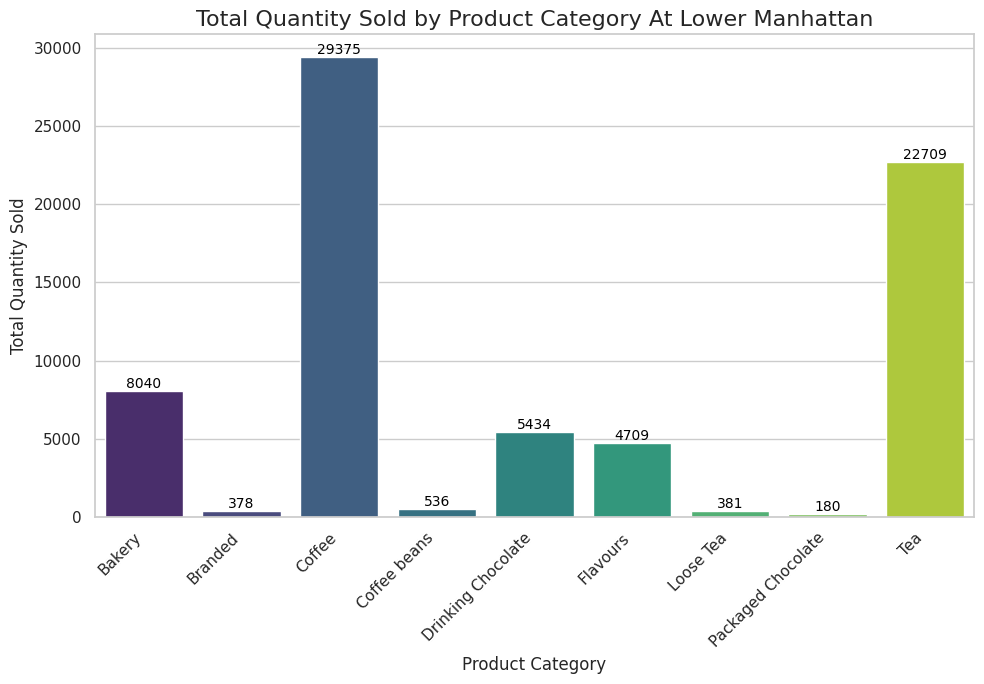

In [37]:
# Set a nice style for the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7)) # Adjust figure size as needed

# Create the bar plot
ax = sns.barplot( # Assign the plot to an axis object 'ax'
    data=dft2,
    x='product_category',
    y='transaction_qty',
    palette='viridis'
)

for p in ax.patches: # Iterate over each bar in the plot
    ax.annotate(f'{p.get_height():.0f}', # Format the height (transaction_qty) as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position x, y
                ha='center', va='center', # Horizontal and vertical alignment
                xytext=(0, 5), # Offset the text a bit above the bar
                textcoords='offset points', # Use offset points for xytext
                fontsize=10,
                color='black')


plt.title('Total Quantity Sold by Product Category At Lower Manhattan', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### Dataframe ร้าน Astoria
- groupby ข้อมูลด้วย วันที่ และ ประเภทสินค้า ด้วยผลรวม จำนวนการขาย และ ราคาสินค้า

In [34]:
df_AS = df_AS.groupby(['transaction_date','product_category'])[['transaction_qty','unit_price']].sum().reset_index()
df_AS

,transaction_date,product_category,transaction_qty,unit_price
0,2023-01-01,Bakery,17,61.00
1,2023-01-01,Coffee,125,248.65
2,2023-01-01,Drinking Chocolate,36,100.50
3,2023-01-01,Tea,99,190.50
4,2023-01-02,Bakery,36,127.25
...,...,...,...,...
1101,2023-06-30,Coffee beans,2,34.50
1102,2023-06-30,Drinking Chocolate,39,111.25
1103,2023-06-30,Flavours,28,16.80
1104,2023-06-30,Loose Tea,4,38.10


In [35]:
df_AS['year'] = df_AS['transaction_date'].dt.year
df_AS['month'] = df_AS['transaction_date'].dt.month
df_AS['day'] = df_AS['transaction_date'].dt.day
dft3 = df_AS.groupby(['product_category'])['transaction_qty'].sum().reset_index()
dft3

,product_category,transaction_qty
0,Bakery,7496
1,Branded,279
2,Coffee,29655
3,Coffee beans,502
4,Drinking Chocolate,6351
5,Flavours,2206
6,Loose Tea,344
7,Packaged Chocolate,110
8,Tea,24048


<ipython-input-36-3841921198>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( # Assign the plot to an axis object 'ax'


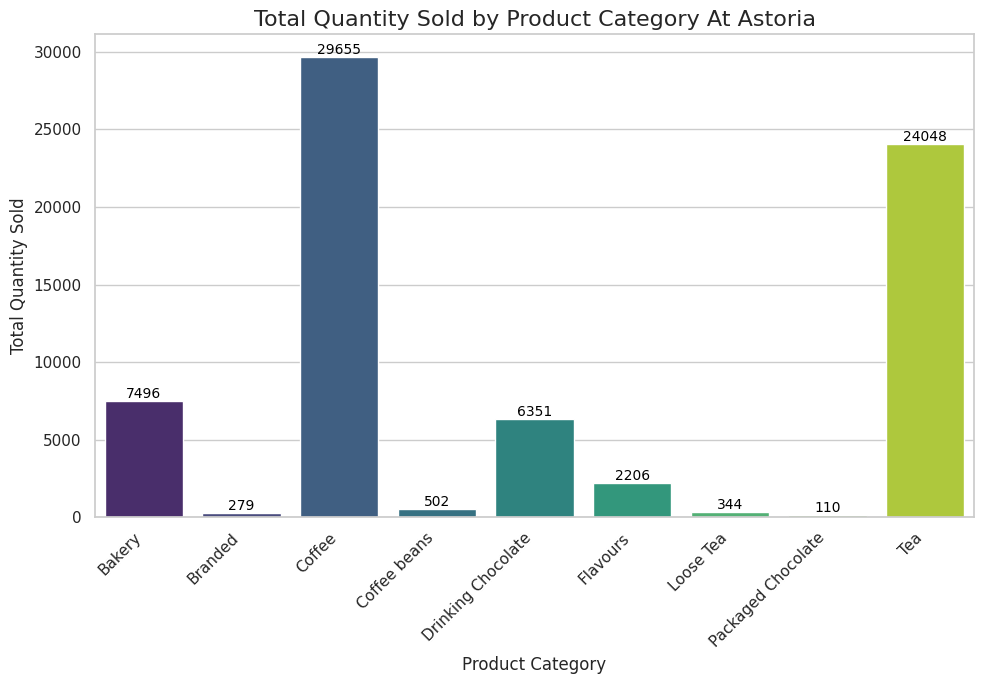

In [36]:
# Set a nice style for the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7)) # Adjust figure size as needed

# Create the bar plot
ax = sns.barplot( # Assign the plot to an axis object 'ax'
    data=dft3,
    x='product_category',
    y='transaction_qty',
    palette='viridis'
)

for p in ax.patches: # Iterate over each bar in the plot
    ax.annotate(f'{p.get_height():.0f}', # Format the height (transaction_qty) as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position x, y
                ha='center', va='center', # Horizontal and vertical alignment
                xytext=(0, 5), # Offset the text a bit above the bar
                textcoords='offset points', # Use offset points for xytext
                fontsize=10,
                color='black')


plt.title('Total Quantity Sold by Product Category At Astoria', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### เปรียบเทียบ Data qty ของทั้ง 3 ร้าน

In [47]:
dft1['Source'] = 'Dataset 1' # อาจจะเป็น 'Q1 Sales', 'Region A', 'Year 2023'
dft2['Source'] = 'Dataset 2' # อาจจะเป็น 'Q2 Sales', 'Region B', 'Year 2024'
dft3['Source'] = 'Dataset 3' # อาจจะเป็น 'Q3 Sales', 'Region C', 'Year 2025'

# --- 3. รวม DataFrame ทั้งหมดเข้าด้วยกัน ---
df_combined = pd.concat([dft1, dft2, dft3], ignore_index=True)

print("DataFrame ที่รวมกัน (df_combined) 5 แถวแรก:")
print(df_combined.head())

DataFrame ที่รวมกัน (df_combined) 5 แถวแรก:
     product_category  transaction_qty     Source
0              Bakery             7678  Dataset 1
1             Branded              119  Dataset 1
2              Coffee            30220  Dataset 1
3        Coffee beans              790  Dataset 1
4  Drinking Chocolate             5672  Dataset 1


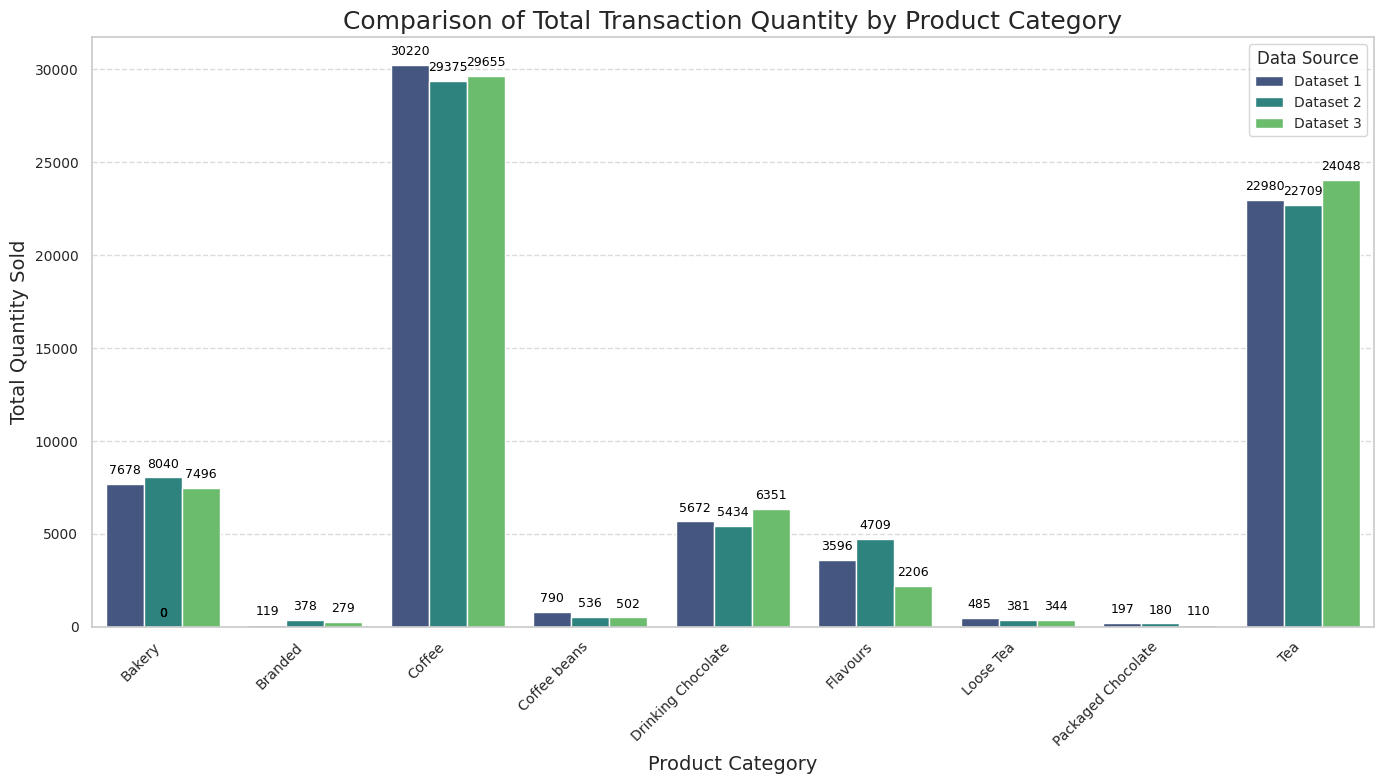

In [53]:
# --- 2. สร้างกราฟเปรียบเทียบ (Grouped Bar Chart) ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8)) # ปรับขนาดกราฟให้เหมาะสม

# Assign plot to 'ax' variable to easily add labels
ax = sns.barplot(
    data=df_combined,
    x='product_category',
    y='transaction_qty',
    hue='Source',
    palette='viridis'
)

# --- 3. เพิ่ม Numeric Label บนยอดแท่งกราฟแต่ละแท่ง ---
for p in ax.patches: # วนลูปผ่านแต่ละแท่งกราฟ (patch) ใน ax
    # ax.annotate ใช้สำหรับเพิ่มข้อความลงบนกราฟ
    ax.annotate(f'{p.get_height():.0f}', # ข้อความที่จะแสดง (ค่าความสูงของแท่งกราฟ, ไม่แสดงทศนิยม)
                (p.get_x() + p.get_width() / 2., p.get_height()), # ตำแหน่ง x, y ของข้อความ
                ha='center', va='bottom', # จัดตำแหน่งข้อความ: กลางแนวนอน, ชิดล่างแนวตั้ง
                xytext=(0, 5), # ชดเชยตำแหน่งข้อความ 5 จุดขึ้นไปจากยอดแท่ง
                textcoords='offset points', # ตีความ xytext เป็นการชดเชยจุด
                fontsize=9, # ขนาดตัวอักษรของ label
                color='black') # สีของตัวอักษร

# --- 4. ปรับแต่งกราฟเพื่อความชัดเจน ---
plt.title('Comparison of Total Transaction Quantity by Product Category', fontsize=18)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Data Source', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-60-304699162>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


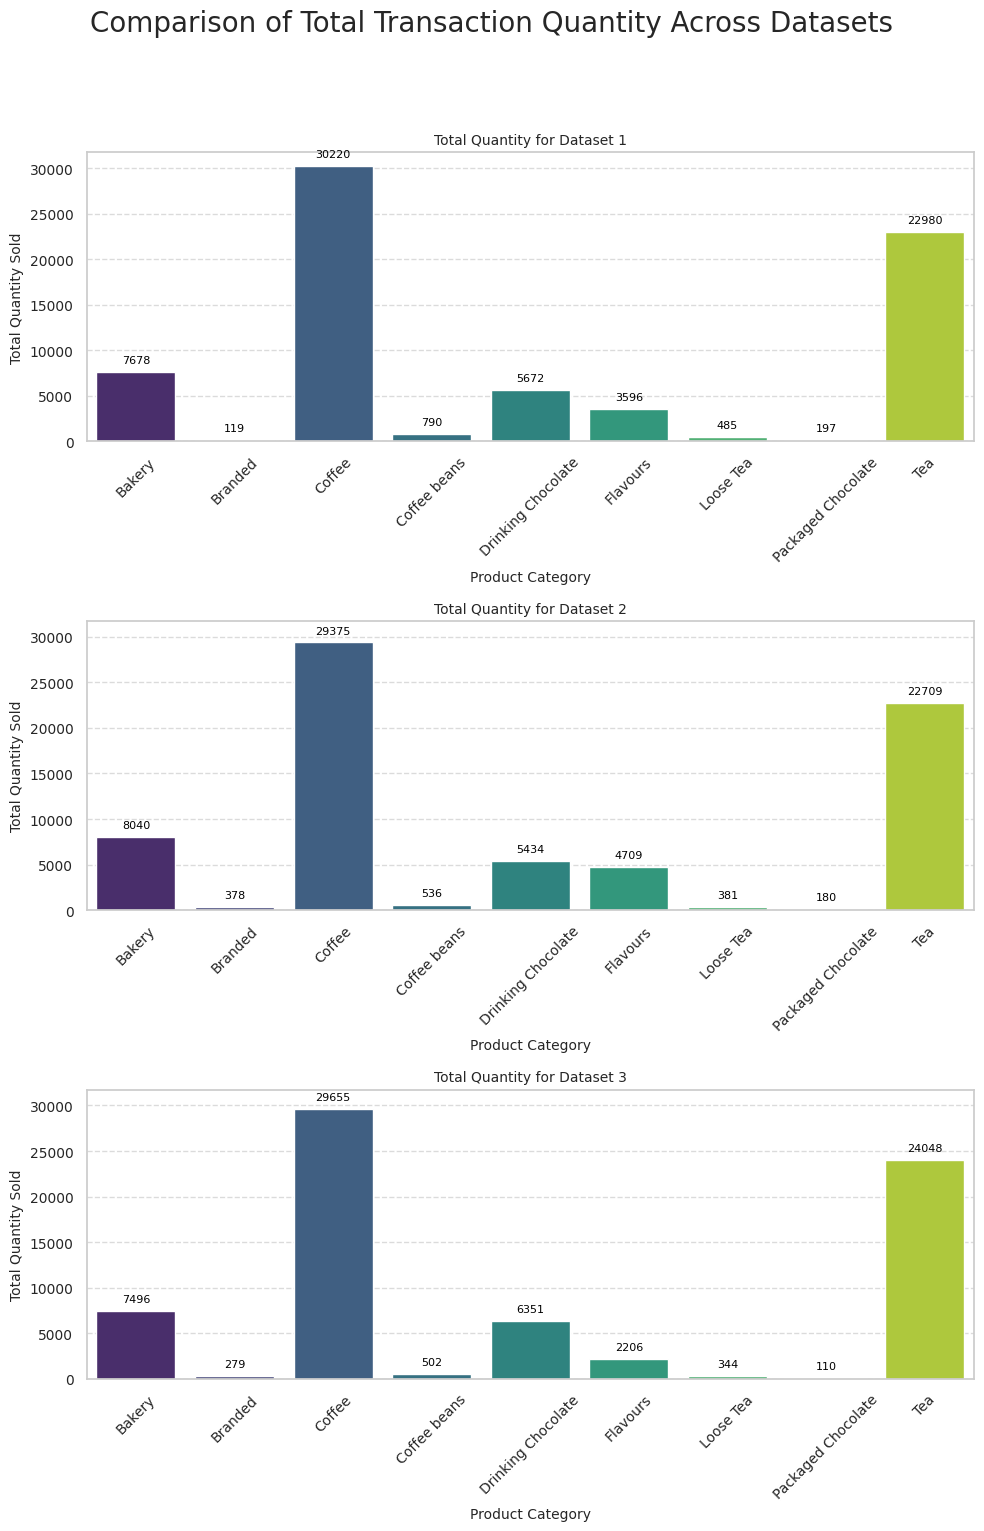

In [60]:
# --- 2. สร้าง Figure และ Axes สำหรับ 3 Subplots (3 แถว, 1 คอลัมน์) ---
# fig: คือทั้งรูป (Figure)
# axes: คือ array ของ Axes (กราฟย่อย)
# (3, 1): คือ 3 แถว, 1 คอลัมน์
# figsize: ขนาดโดยรวมของรูป (ปรับให้สูงขึ้นสำหรับแนวตั้ง)
# sharey=True: ให้แกน Y ของทุกกราฟย่อยใช้ Scale เดียวกัน (ดีสำหรับการเปรียบเทียบ)
#               ถ้าตัวเลขแตกต่างกันมาก อาจจะตั้งเป็น sharey=False
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=True) # <<< เปลี่ยนตรงนี้! 3 แถว, 1 คอลัมน์

# กำหนดชื่อให้กับแต่ละ DataFrame สำหรับใช้เป็นชื่อกราฟย่อย
datasets = [
    {'data': dft1, 'name': 'Dataset 1'},
    {'data': dft2, 'name': 'Dataset 2'},
    {'data': dft3, 'name': 'Dataset 3'}
]

# --- 3. วนลูปสร้างกราฟแท่งแต่ละอันในแต่ละ Subplot ---
for i, ds in enumerate(datasets):
    ax = axes[i] # เลือก Axes (subplot) ปัจจุบัน

    # สร้าง Bar Plot บน Axes นั้น
    sns.barplot(
        data=ds['data'],
        x='product_category',
        y='transaction_qty',
        palette='viridis',
        ax=ax # สำคัญ! ระบุว่าให้พลอตกราฟนี้ลงบน ax นี้
    )

    # เพิ่ม Numeric Label บนยอดแท่งกราฟแต่ละแท่ง
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=8,
                    color='black')

    # ตั้งชื่อกราฟย่อย
    ax.set_title(f'Total Quantity for {ds["name"]}', fontsize=10)
    ax.set_xlabel('Product Category', fontsize=10)
    ax.set_ylabel('Total Quantity Sold', fontsize=10) # ใส่ label แกน Y ทุกกราฟถ้าจัดแนวตั้ง
    ax.tick_params(axis='x', rotation=45, labelsize=10) # หมุนฉลากแกน X
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7) # เพิ่มเส้น Grid บนแกน Y

# --- 4. เพิ่มชื่อหลักของ Figure และปรับ Layout ---
plt.suptitle('Comparison of Total Transaction Quantity Across Datasets', y=1.02, fontsize=20) # ชื่อใหญ่ของทั้งรูป
plt.tight_layout(rect=[0, 0, 1, 0.98]) # ปรับเลย์เอาต์เพื่อไม่ให้ชื่อใหญ่ทับกราฟ
plt.show()